In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
airbnb = pd.read_csv('airbnb.csv')

### Duplicates

In [4]:
airbnb.shape

(13232, 9)

In [5]:
airbnb = airbnb.drop_duplicates()

In [6]:
airbnb.shape

(13232, 9)

### Outliers

In [7]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])    
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(airbnb)

room_id | 0 | int64
host_id | 0 | int64
reviews | 296 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


/Users/carolinedavis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [9]:
airbnb.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13222.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.284677,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.123236,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


In this type of data I don't think it is necessary to remove outliers because some homes just happen to be very differnt from others which isn't a bad thing in this case. 

### Missing Values 

In [12]:
n_records = len(airbnb)
def missing_values_col(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_col(airbnb)

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0007557436517533253 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64


In [18]:
airbnb_no_null = airbnb.dropna(subset=["overall_satisfaction"])
airbnb_no_null.shape

(13222, 9)

In [20]:
airbnb['overall_satisfaction_imp'] = airbnb.overall_satisfaction.fillna("not given")
airbnb.shape

(13232, 10)

### Normalization/Standardization

In [22]:
airbnb.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13222.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.284677,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.123236,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


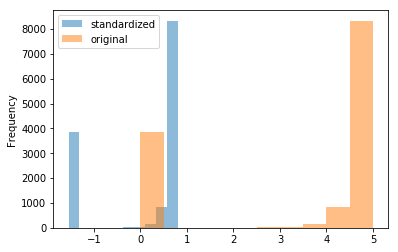

In [24]:
overall_satisfaction_original = airbnb.overall_satisfaction

overall_satisfaction_mu = airbnb.overall_satisfaction.mean()
overall_satisfaction_sigma = airbnb.overall_satisfaction.std()

overall_satisfaction_standardized = overall_satisfaction_original.apply(lambda x: (x-overall_satisfaction_mu) / overall_satisfaction_sigma)

overall_satisfaction_standardized.plot.hist(label="standardized", alpha=0.5)
overall_satisfaction_original.plot.hist(label="original", alpha=0.5)
plt.legend();

NameError: name 'overall_satisfaction_standarized' is not defined